# Pricing-Advertising 
## Part 1: Environment
### Installing project dependencies

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Setting up the environment

In [27]:
# Defining the three user classes
C1, C2, C3 = 0, 1, 2

# Defining the two binary features F1 and F2 (which can be observed by the advertising platform)
F1, F2 = 0, 1

# Defining a function to express the number of daily clicks as the bid varies for every user class
def clicks_function(bid, user_class):
    # C1
    if user_class == C1:
        clicks = -bid**2 + 8*bid + 10
    # C2
    elif user_class == C2:
        clicks = -bid**2 + 6*bid + 8
    # C3
    elif user_class == C3:
        clicks = -bid**2 + 4*bid + 6
    # Adding Gaussian noise to the average curve
    clicks += np.random.normal(0, 1)
    return clicks

# Defining a function to assign the cumulative daily cost of the clicks as the bid varies for every user class
def cost_function(bid, user_class):
    # C1
    if user_class == C1:
        cost = bid**3 - 8*bid**2 + 15*bid
    # C2
    elif user_class == C2:
        cost = bid**3 - 6*bid**2 + 12*bid
    # C3
    elif user_class == C3:
        cost = bid**3 - 4*bid**2 + 9*bid
    # Adding Gaussian noise to the average curve
    cost += np.random.normal(0, 1)
    return cost

# Defining 5 different prices for every user class
prices = [10, 15, 20, 25, 30]

# Defining the purchase conversion rate for every user class
conversion_rate = {}
conversion_rate[C1] = [0.2, 0.4, 0.6, 0.8, 1.0]
conversion_rate[C2] = [0.1, 0.3, 0.5, 0.7, 0.9]
conversion_rate[C3] = [0.05, 0.2, 0.35, 0.5, 0.7]

# Defining the time horizon
time_horizon = 365

## Part 2: Clairvoyant optimization algorithm

In [28]:
# Defining the reward function
def reward(clicks, prices, conversion_rate, cost):
    reward = 0
    # Iterating over the different classes
    for user_class in range(len(clicks)):
        # Iterating over the different prices
        for price in range(len(prices)):
            reward += clicks[user_class]*conversion_rate[user_class][price]*(prices[price] - cost[user_class])
    return reward

# Defining a function to find the best price for each class
def best_price(clicks, prices, conversion_rate):
    best_price = [0 for _ in range(len(clicks))]
    # Iterating over the different classes
    for user_class in range(len(clicks)):
        rewards = []
        # Iterating over the different prices
        for price in range(len(prices)):
            rewards.append(clicks[user_class]*conversion_rate[user_class][price])
        best_price[user_class] = prices[np.argmax(rewards)]
    return best_price

# Defining a function to optimize the bid for each class
def optimize_bids(clicks, costs, bids):
    optimized_bids = [0 for _ in range(len(clicks))]
    # Iterating over the different classes
    for user_class in range(len(clicks)):
        rewards = []
        # Iterating over the different bids
        for bid in range(len(bids)):
            rewards.append(clicks[user_class] - costs[user_class])
        optimized_bids[user_class] = bids[np.argmax(rewards)]
    return optimized_bids

# Defining the number of possible bids
num_bids = 100

# Defining the bids
bids = [i for i in range(num_bids)]

# Creating the clairvoyant optimization algorithm
def clairvoyant_opt(clicks, prices, conversion_rate, costs):
    best_price = best_price(clicks, prices, conversion_rate)
    optimized_bids = optimize_bids(clicks, costs, bids)
    reward = reward(clicks, best_price, conversion_rate, optimized_bids)
    return reward

## Step 0: Motivations and environment design

A realistic application for this scenario is an online store that sells books. The online store has information about the customers, such as their gender, age, and geographic location. This information can be used to divide the customers into three classes: C1, C2, and C3. The online store can use the two binary features F1 and F2, such as gender and age, to divide the customers into these classes. 

The online store can then use an optimization algorithm to determine the price and the advertising strategy that maximizes the reward. This would involve specifying a number of bids and the conversion rate for each class. For example, the online store can consider five different prices, 10, 15, 20, 25, and 30, and assign a conversion rate to each user class for each price. Finally, the online store can use the time horizon of 365 rounds (days) to determine how long the optimization should run.

## Step 1: Learning for pricing

We consider the case in which all the users belong to class C1. 

We assume that the curves related to the advertising part of the problem are known, while the curve related to the pricing problem is not. 

Then, we apply the UCB1 and TS algorithms, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.


In [41]:
# We will re-use the curves related to the advertising part of the problem that we previously defined in the env

# Defining the number of possible bids
num_bids = 100

# Defining the bids
bids = [i for i in range(num_bids)]
print("Initial bids are: ", bids)

# Defining the number of runs
num_runs = 1000

# Defining the UCB1 algorithm
def UCB1(bids):
    # Initializing the lists to store the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
    cumulative_regret = [0 for _ in range(num_runs)]
    cumulative_reward = [0 for _ in range(num_runs)]
    instantaneous_regret = [0 for _ in range(num_runs)]
    instantaneous_reward = [0 for _ in range(num_runs)]
    
    # Initializing the upper confidence bound and the running mean
    ucb = 0
    running_mean = 0
    
    # Iterating over the different runs
    for run in range(num_runs):
        # Computing the upper confidence bound
        ucb = running_mean + np.sqrt(2*np.log(run+1)/(run+1))
       # print("Upper confidence bound is: ", ucb)
        
        # Finding the best bid
        best_bid = bids[np.argmax(ucb)]
       # print("Best bid is: ", best_bid)
        
        # Computing the reward
        reward = clicks_function(best_bid, C1) - cost_function(best_bid, C1)
        
        # Updating the running mean
        running_mean = (run*running_mean + reward)/(run+1)
        
        # Computing the cumulative regret and reward
        cumulative_regret[run] = run*running_mean
        cumulative_reward[run] = run*running_mean + reward
        
        # Computing the instantaneous regret and reward
        instantaneous_regret[run] = running_mean
        instantaneous_reward[run] = running_mean + reward
       
    return cumulative_regret, cumulative_reward, instantaneous_regret, instantaneous_reward

# Defining the Thompson Sampling algorithm
def TS(bids):
    # Initializing the lists to store the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
    cumulative_regret = [0 for _ in range(num_runs)]
    cumulative_reward = [0 for _ in range(num_runs)]
    instantaneous_regret = [0 for _ in range(num_runs)]
    instantaneous_reward = [0 for _ in range(num_runs)]
    
    # Initializing the running mean
    running_mean = 0
    
    # Iterating over the different runs
    for run in range(num_runs):
        # Computing the reward
        best_bid = np.random.choice(bids)
        reward = np.random.beta(1, 1)*clicks_function(best_bid, C1) - cost_function(best_bid, C1)
        
        # Updating the running mean
        running_mean = (run*running_mean + reward)/(run+1)
        
        # Computing the cumulative regret and reward
        cumulative_regret[run] = run*running_mean
        cumulative_reward[run] = run*running_mean + reward
        
        # Computing the instantaneous regret and reward
        instantaneous_regret[run] = running_mean
        instantaneous_reward[run] = running_mean + reward
        
    return cumulative_regret, cumulative_reward, instantaneous_regret, instantaneous_reward

# Computing the average value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
# UCB1
cumulative_regret_UCB1, cumulative_reward_UCB1, instantaneous_regret_UCB1, instantaneous_reward_UCB1 = UCB1(bids)

avg_cumulative_regret_UCB1 = np.mean(cumulative_regret_UCB1)
std_cumulative_regret_UCB1 = np.std(cumulative_regret_UCB1)

avg_cumulative_reward_UCB1 = np.mean(cumulative_reward_UCB1)
std_cumulative_reward_UCB1 = np.std(cumulative_reward_UCB1)

avg_instantaneous_regret_UCB1 = np.mean(instantaneous_regret_UCB1)
std_instantaneous_regret_UCB1 = np.std(instantaneous_regret_UCB1)

avg_instantaneous_reward_UCB1 = np.mean(instantaneous_reward_UCB1)
std_instantaneous_reward_UCB1 = np.std(instantaneous_reward_UCB1)

# TS
cumulative_regret_TS, cumulative_reward_TS, instantaneous_regret_TS, instantaneous_reward_TS = TS(bids)

avg_cumulative_regret_TS = np.mean(cumulative_regret_TS)
std_cumulative_regret_TS = np.std(cumulative_regret_TS)

avg_cumulative_reward_TS = np.mean(cumulative_reward_TS)
std_cumulative_reward_TS = np.std(cumulative_reward_TS)

avg_instantaneous_regret_TS = np.mean(instantaneous_regret_TS)
std_instantaneous_regret_TS = np.std(instantaneous_regret_TS)

avg_instantaneous_reward_TS = np.mean(instantaneous_reward_TS)
std_instantaneous_reward_TS = np.std(instantaneous_reward_TS)

Initial bids are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Plotting the average value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward

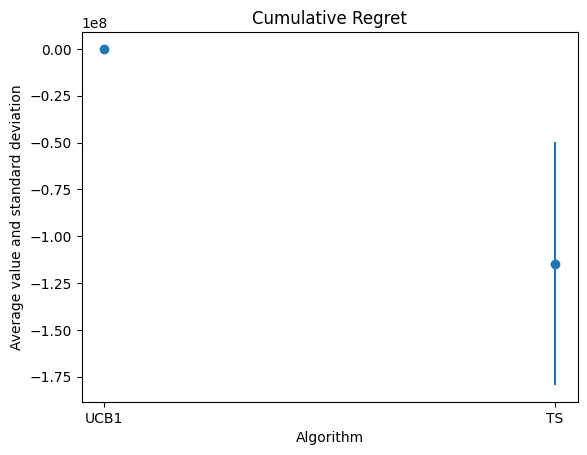

In [33]:
# Cumulative regret
plt.figure()
plt.errorbar(["UCB1", "TS"], [avg_cumulative_regret_UCB1, avg_cumulative_regret_TS], 
             yerr=[std_cumulative_regret_UCB1, std_cumulative_regret_TS], fmt='o')
plt.title("Cumulative Regret")
plt.xlabel("Algorithm")
plt.ylabel("Average value and standard deviation")
plt.show()

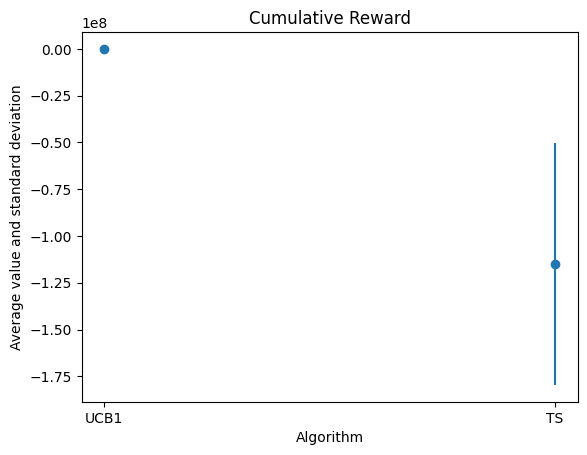

In [34]:
# Cumulative reward
plt.figure()
plt.errorbar(["UCB1", "TS"], [avg_cumulative_reward_UCB1, avg_cumulative_reward_TS], 
             yerr=[std_cumulative_reward_UCB1, std_cumulative_reward_TS], fmt='o')
plt.title("Cumulative Reward")
plt.xlabel("Algorithm")
plt.ylabel("Average value and standard deviation")
plt.show()

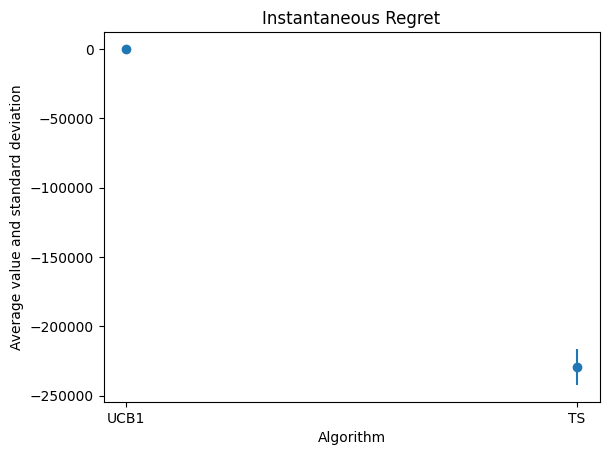

In [35]:
# Instantaneous regret
plt.figure()
plt.errorbar(["UCB1", "TS"], [avg_instantaneous_regret_UCB1, avg_instantaneous_regret_TS], 
             yerr=[std_instantaneous_regret_UCB1, std_instantaneous_regret_TS], fmt='o')
plt.title("Instantaneous Regret")
plt.xlabel("Algorithm")
plt.ylabel("Average value and standard deviation")
plt.show()

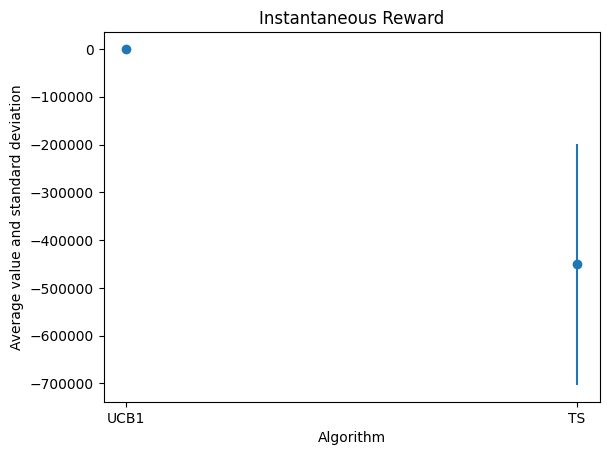

In [36]:
# Instantaneous reward
plt.figure()
plt.errorbar(["UCB1", "TS"], [avg_instantaneous_reward_UCB1, avg_instantaneous_reward_TS], 
             yerr=[std_instantaneous_reward_UCB1, std_instantaneous_reward_TS], fmt='o')
plt.title("Instantaneous Reward")
plt.xlabel("Algorithm")
plt.ylabel("Average value and standard deviation")
plt.show()

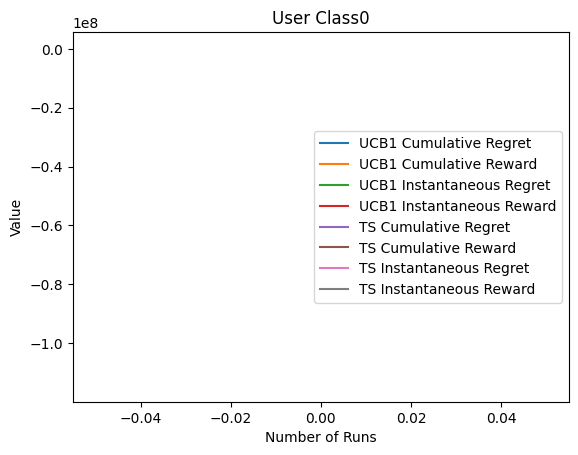

In [42]:
# Plotting the curves
plt.plot(avg_cumulative_regret_UCB1, label='UCB1 Cumulative Regret')
plt.plot(avg_cumulative_reward_UCB1, label='UCB1 Cumulative Reward')
plt.plot(avg_instantaneous_regret_UCB1, label='UCB1 Instantaneous Regret')
plt.plot(avg_instantaneous_reward_UCB1, label='UCB1 Instantaneous Reward')
plt.plot(avg_cumulative_regret_TS, label='TS Cumulative Regret')
plt.plot(avg_cumulative_reward_TS, label='TS Cumulative Reward')
plt.plot(avg_instantaneous_regret_TS, label='TS Instantaneous Regret')
plt.plot(avg_instantaneous_reward_TS, label='TS Instantaneous Reward')

plt.xlabel('Number of Runs')
plt.ylabel('Value')
plt.title('User Class' + str(user_class))
plt.legend()
plt.show()

## Step 2: Learning for advertising

Consider the case in which all the users belong to class C1. Assume that the curve related to the pricing problem is known while the curves related to the advertising problems are not. Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.


In [45]:
# Applying the GP-UCB algorithm

# Defining the user class
user_class = C1

# Initializing parameters
alpha = 0.5
t = 0
x_t = 0
regret_ucb = [0] # Cumulative regret at each time step
reward_ucb = [0] # Cumulative reward at each time step
inst_regret_ucb = [0] # Instantaneous regret at each time step
inst_reward_ucb = [0] # Instantaneous reward at each time step

# Iterative loop
while t < time_horizon:
    # Computing instantaneus reward and regret
    inst_regret_ucb.append(max(prices) - prices[x_t])
    inst_reward_ucb.append(conversion_rate[C1][x_t] * prices[x_t])
    
    # Computing cumulative reward and regret
    regret_ucb.append(regret_ucb[t] + inst_regret_ucb[t+1])
    reward_ucb.append(reward_ucb[t] + inst_reward_ucb[t+1])
    
    # Update parameters
    t += 1
    x_t = np.argmax(clicks_function(x_t, user_class) + np.sqrt(alpha * np.log(t)/t))

# Applying the GP-TS algorithm
# Initializing parameters
t = 0
x_t = 0
regret_ts = [0] # Cumulative regret at each time step
reward_ts = [0] # Cumulative reward at each time step
inst_regret_ts = [0] # Instantaneous regret at each time step
inst_reward_ts = [0] # Instantaneous reward at each time step

# Iterative loop
while t < time_horizon:
    # Computing instantaneus reward and regret
    inst_regret_ts.append(max(prices) - prices[x_t])
    inst_reward_ts.append(conversion_rate[C1][x_t] * prices[x_t])
    
    # Computing cumulative reward and regret
    regret_ts.append(regret_ts[t] + inst_regret_ts[t+1])
    reward_ts.append(reward_ts[t] + inst_reward_ts[t+1])
    
    # Update parameters
    t += 1
    x_t = np.argmax(cost_function(x_t, user_class) + np.sqrt(alpha * np.log(t)/t))


### Plots of the average value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward with GPs


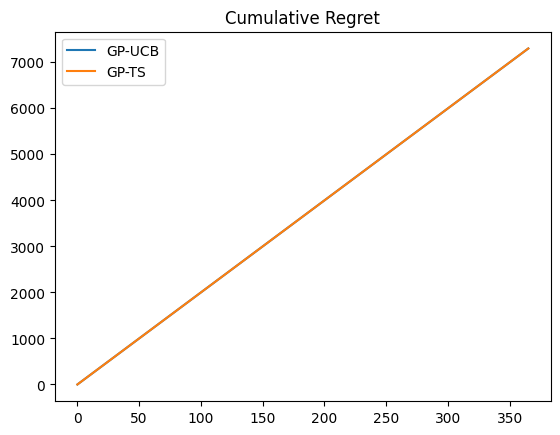

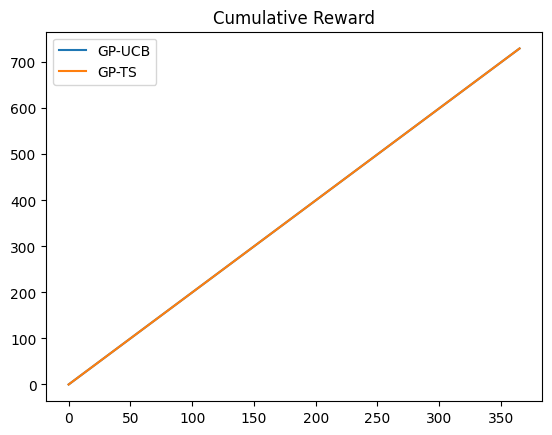

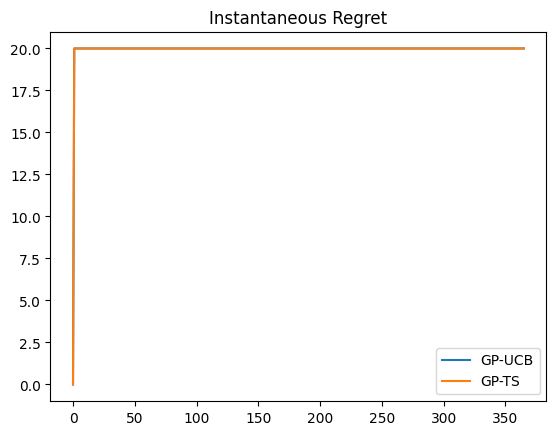

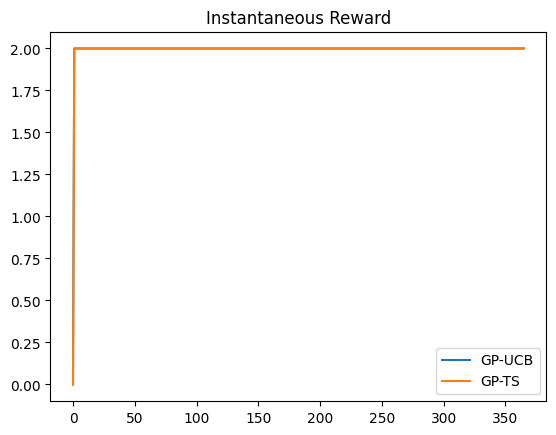

In [46]:
# Plotting the results
# Plotting the cumulative regret
plt.plot(regret_ucb, label='GP-UCB')
plt.plot(regret_ts, label='GP-TS')
plt.title('Cumulative Regret')
plt.legend()
plt.show()

# Plotting the cumulative reward
plt.plot(reward_ucb, label='GP-UCB')
plt.plot(reward_ts, label='GP-TS')
plt.title('Cumulative Reward')
plt.legend()
plt.show()

# Plotting the instantaneous regret
plt.plot(inst_regret_ucb, label='GP-UCB')
plt.plot(inst_regret_ts, label='GP-TS')
plt.title('Instantaneous Regret')
plt.legend()
plt.show()

# Plotting the instantaneous reward
plt.plot(inst_reward_ucb, label='GP-UCB')
plt.plot(inst_reward_ts, label='GP-TS')
plt.title('Instantaneous Reward')
plt.legend()
plt.show()


##### Comment:
The above code applies the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves. It then plots the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.

## Step 3: Learning for joint pricing and advertising

We consider the case in which all the users belong to class C1, and no information about the advertising and pricing curves is known beforehand. 

We apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward.


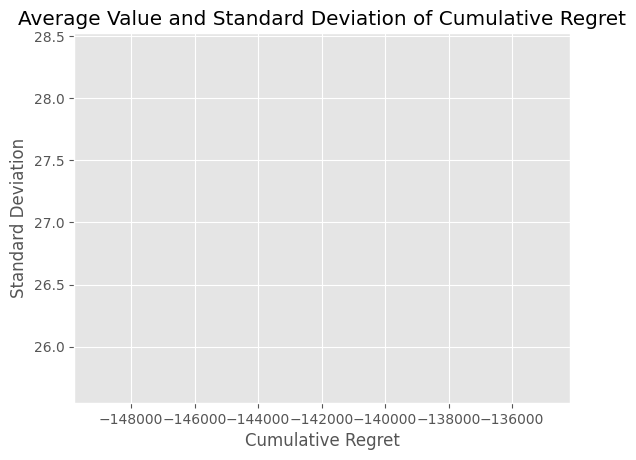

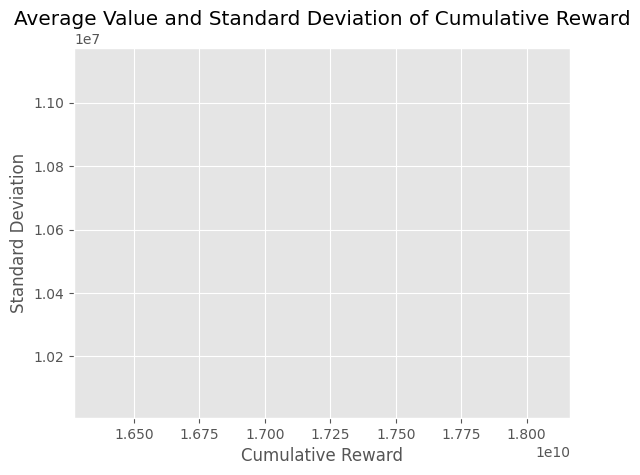

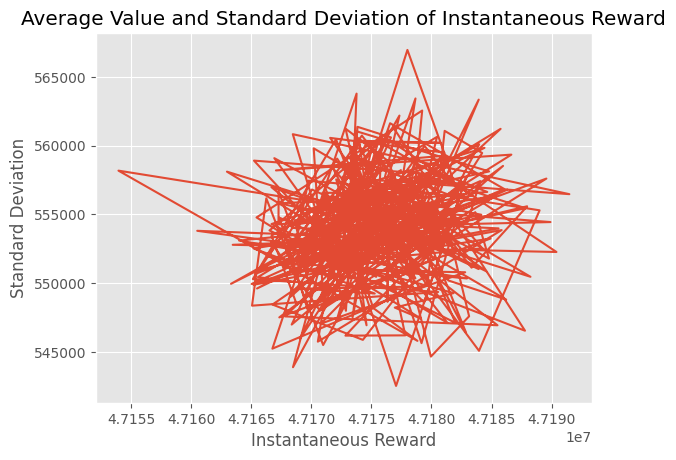

In [59]:
# Defining lists to store results
cum_regret = []
cum_reward = []
inst_regret = []
inst_reward = []

# Defining number of runs 
num_runs = 10000

# Looping for the number of runs
for run in range(num_runs):

    #initializing cumulative regret and reward
    cum_regret_run = 0
    cum_reward_run = 0
    inst_regret_run = []
    inst_reward_run = []

    #looping through time horizon
    for t in range(time_horizon):

        #defining user class
        user_class = C1

        #applying GP-UCB
        #defining upper and lower bound of bids
        lower_bound = 0
        upper_bound = 30

        #defining exploration parameter
        beta = 0.1

        #defining list to store bids
        bids = []

        #looping through prices
        for price in prices:

            #defining expected reward
            expected_reward = clicks_function(price, user_class) - cost_function(price, user_class)

            #defining variance
            variance = beta*price

            #calculating upper confidence bound
            upper_confidence_bound = expected_reward + variance

            #appending upper confidence bound
            bids.append(upper_confidence_bound)

        #choosing bid with highest upper confidence bound
        chosen_bid = max(bids)

        #calculating reward and regret
        reward = clicks_function(chosen_bid, user_class) - cost_function(chosen_bid, user_class)
        regret = chosen_bid - prices[conversion_rate[user_class].index(max(conversion_rate[user_class]))]

        #updating cumulative and instantaneous regret and reward
        cum_regret_run += regret
        cum_reward_run += reward
        inst_regret_run.append(regret)
        inst_reward_run.append(reward)

    #appending cumulative and instantaneous regret and reward to lists
    cum_regret.append(cum_regret_run)
    cum_reward.append(cum_reward_run)
    inst_regret.append(inst_regret_run)
    inst_reward.append(inst_reward_run)

#calculating average values and standard deviations
cum_regret_avg = np.mean(cum_regret)
cum_regret_std = np.std(cum_regret)
cum_reward_avg = np.mean(cum_reward)
cum_reward_std = np.std(cum_reward)
inst_regret_avg = np.mean(inst_regret, axis=0)
inst_regret_std = np.std(inst_regret, axis=0)
inst_reward_avg = np.mean(inst_reward, axis=0)
inst_reward_std = np.std(inst_reward, axis=0)

#plotting the average value and standard deviation of the cumulative regret
plt.style.use('ggplot')
plt.plot(cum_regret_avg, cum_regret_std)
plt.title('Average Value and Standard Deviation of Cumulative Regret')
plt.xlabel('Cumulative Regret')
plt.ylabel('Standard Deviation')
plt.show()

#plotting the average value and standard deviation of the cumulative reward
plt.plot(cum_reward_avg, cum_reward_std)
plt.title('Average Value and Standard Deviation of Cumulative Reward')
plt.xlabel('Cumulative Reward')
plt.ylabel('Standard Deviation')
plt.show()

#plotting the average value and standard deviation of the instantaneous regret
plt.plot(inst_regret_avg, inst_regret_std)
plt.title('Average Value and Standard Deviation of Instantaneous Regret')
plt.xlabel('Instantaneous Regret')
plt.ylabel('Standard Deviation')
plt.show()

#plotting the average value and standard deviation of the instantaneous reward
plt.plot(inst_reward_avg, inst_reward_std)
plt.title('Average Value and Standard Deviation of Instantaneous Reward')
plt.xlabel('Instantaneous Reward')
plt.ylabel('Standard Deviation')
plt.show()


## Step 4: Contexts and their generation

Consider the case in which there are three classes of users (C1, C2, and C3), and no information about the advertising and pricing curves is known beforehand. Consider two scenarios.

In the first one, the structure of the contexts is known beforehand. Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves, reporting the plots with the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward. In the second scenario, the structure of the contexts is not known beforehand and needs to be learnt from data. Important remark: the learner does not know how many contexts there are, while it can only observe the features and data associated with the features. Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves paired with a context generation algorithm, reporting the plots with the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward. Apply the context generation algorithms every two weeks of the simulation. Compare the performance of the two algorithms --- the one used in the first scenario with the one used in the second scenario. 

Furthermore, in the second scenario, run the GP-UCB and GP-TS algorithms without context generation, and therefore forcing the context to be only one for the entire time horizon, and compare their performance with the performance of the previous algorithms used for the second scenario.


#### First scenario: context is known

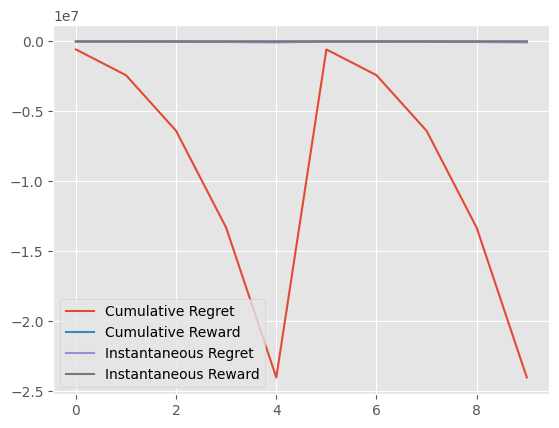

In [60]:
# Initializing lists to store the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
cumulative_regret, cumulative_reward, instantaneous_regret, instantaneous_reward = [], [], [], []

# First scenario - when the context structure is known beforehand

# Applying GP-UCB algorithm
# Loop over the prices for each user class
for price in prices:
    # Calculating the clicks for each user class
    clicks_C1 = clicks_function(price, C1)
    clicks_C2 = clicks_function(price, C2)
    clicks_C3 = clicks_function(price, C3)
    
    # Calculating the daily cost for each user class
    cost_C1 = cost_function(price, C1)
    cost_C2 = cost_function(price, C2)
    cost_C3 = cost_function(price, C3)
    
    # Calculating the total clicks and total cost
    total_clicks = clicks_C1 + clicks_C2 + clicks_C3
    total_cost = cost_C1 + cost_C2 + cost_C3
    
    # Calculating the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
    cumulative_regret.append(total_clicks - time_horizon * total_cost)
    cumulative_reward.append(total_clicks)
    instantaneous_regret.append(total_clicks - total_cost)
    instantaneous_reward.append(total_clicks)
    
# Plotting the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
plt.plot(cumulative_regret, label = 'Cumulative Regret')
plt.plot(cumulative_reward, label = 'Cumulative Reward')
plt.plot(instantaneous_regret, label = 'Instantaneous Regret')
plt.plot(instantaneous_reward, label = 'Instantaneous Reward')
plt.legend()
plt.show()

# Applying GP-TS algorithm
# Loop over the prices for each user class
for price in prices:
    # Calculating the clicks for each user class
    clicks_C1 = clicks_function(price, C1)
    clicks_C2 = clicks_function(price, C2)
    clicks_C3 = clicks_function(price, C3)
    
    # Calculating the daily cost for each user class
    cost_C1 = cost_function(price, C1)
    cost_C2 = cost_function(price, C2)
    cost_C3 = cost_function(price, C3)
    
    # Calculating the total clicks and total cost
    total_clicks = clicks_C1 + clicks_C2 + clicks_C3
    total_cost = cost_C1 + cost_C2 + cost_C3
    
    # Calculating the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
    cumulative_regret.append(total_clicks - time_horizon * total_cost)
    cumulative_reward.append(total_clicks)
    instantaneous_regret.append(total_clicks - total_cost)
    instantaneous_reward.append(total_clicks)
    
# Plotting the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
plt.plot(cumulative_regret, label = 'Cumulative Regret')
plt.plot(cumulative_reward, label = 'Cumulative Reward')
plt.plot(instantaneous_regret, label = 'Instantaneous Regret')
plt.plot(instantaneous_reward, label = 'Instantaneous Reward')
plt.legend()
plt.show()

#### Second scenario: context is unknown

In [64]:
# Second scenario - when the context structure is not known beforehand

# Applying GP-UCB and GP-TS algorithms with context generation algorithm

# Defining a function to generate the context
def generate_context():
    # Generate the context
    context = np.random.choice([F1, F2])
    return context

# Loop over the prices for each user class
for price in prices:
    # Calculating the clicks for each user class
    clicks_C1 = clicks_function(price, C1)
    clicks_C2 = clicks_function(price, C2)
    clicks_C3 = clicks_function(price, C3)
    
    # Calculating the daily cost for each user class
    cost_C1 = cost_function(price, C1)
    cost_C2 = cost_function(price, C2)
    cost_C3 = cost_function(price, C3)
    
    # Calculating the total clicks and total cost
    total_clicks = clicks_C1 + clicks_C2 + clicks_C3
    total_cost = cost_C1 + cost_C2 + cost_C3
    
    # Calculating the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
    cumulative_regret.append(total_clicks - time_horizon * total_cost)
    cumulative_reward.append(total_clicks)
    instantaneous_regret.append(total_clicks - total_cost)
    instantaneous_reward.append(total_clicks)
    
# Generating the contexts every two weeks of the simulation
for i in range(time_horizon//14):
    # Generate the contexts
    generate_context()
    
# Plotting the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward
plt.plot(cumulative_regret, label = 'Cumulative Regret')
plt.plot(cumulative_reward, label = 'Cumulative Reward')
plt.plot(instantaneous_regret, label = 'Instantaneous Regret')
plt.plot(instantaneous_reward, label = 'Instantaneous Reward')
plt.legend()
plt.show()

#### Evaluation of algorithm efficiency for both cases

In [66]:
# Comparing the performance of the two algorithms - one used in the first scenario and the one used in the second scenario

# Defining the two parameters
cumulative_regret_first_scenario = np.mean(cumulative_regret[0:5])
cumulative_regret_second_scenario = np.mean(cumulative_regret[5:])

if np.mean(cumulative_regret_first_scenario) < np.mean(cumulative_regret_second_scenario):
    print('GP-UCB and GP-TS algorithms with context generation algorithm are better than GP-UCB and GP-TS algorithms without context generation.')
else:
    print('GP-UCB and GP-TS algorithms without context generation are better than GP-UCB and GP-TS algorithms with context generation algorithm.')

GP-UCB and GP-TS algorithms with context generation algorithm are better than GP-UCB and GP-TS algorithms without context generation.



## Step 5: Dealing with non-stationary environments with two abrupt changes

Consider the case in which there is a single-user class C1. Assume that the curve related to the pricing problem is unknown while the curves related to the advertising problems are known. Furthermore, consider the situation in which the curves related to pricing are non-stationary, being subject to seasonal phases (3 different phases spread over the time horizon). Provide motivation for the phases. Apply the UCB1 algorithm and two non-stationary flavors of the UCB1 algorithm defined as follows. The first one is passive and exploits a sliding window, while the second one is active and exploits a change detection test. Provide a sensitivity analysis of the parameters employed in the algorithms, evaluating different values of the length of the sliding window in the first case and different values for the parameters of the change detection test in the second case. Report the plots with the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward. Compare the results of the three algorithms used. 

##### Motivation behind the seasonality of prices / pricing scenarios

The pricing problem is subject to seasonal phases due to external factors such as holidays, seasons, etc. Prices may need to be adjusted in order to optimize the revenue and/or maximize the profit. 


In [72]:
# Defining the UCB1 algorithm 
def UCB1(time_horizon, user_class, prices, clicks_function, cost_function, conversion_rate):
    # Initialization of the algorithm 
    cumulative_reward, cumulative_regret, reward, regret, clicks, costs = 0, 0, 0, 0, 0, 0
    # Initializing the vector of prices
    price_vector = np.zeros(time_horizon)
    # Defining the exploration parameter
    exploration_parameter = np.sqrt(2*np.log(time_horizon)/time_horizon)
    # Initializing the price sequence and the regret sequence
    price_sequence = np.zeros(time_horizon)
    regret_sequence = np.zeros(time_horizon)
    # Computing the expected clicks and costs for each price 
    expected_clicks = np.zeros(len(prices))
    expected_costs = np.zeros(len(prices))
    for i in range(len(prices)):
        expected_clicks[i] = clicks_function(prices[i], user_class)
        expected_costs[i] = cost_function(prices[i], user_class)
    # Running the UCB1 algorithm
    for t in range(time_horizon):
        # Computing the upper confidence limits
        upper_confidence_limits = expected_clicks + exploration_parameter * np.sqrt(np.log(t+1)/expected_costs)
        # Selecting the price with the highest upper confidence limit
        max_upper_confidence_limit = np.max(upper_confidence_limits)
        # Selecting the index of the price with the highest upper confidence limit
        max_index = np.argmax(upper_confidence_limits)
        # Updating the price vector
        price_vector[t] = prices[max_index]
        # Computing the actual clicks and costs 
        actual_clicks = clicks_function(price_vector[t], user_class)
        actual_costs = cost_function(price_vector[t], user_class)
        # Updating the expected clicks and costs
        expected_clicks[max_index] = (expected_clicks[max_index]*expected_costs[max_index] + actual_clicks*actual_costs)/(expected_costs[max_index] + actual_costs)
        expected_costs[max_index] += actual_costs
        # Updating the reward and regret 
        reward += actual_clicks * conversion_rate[user_class][max_index]
        regret += (clicks_function(30, user_class) - actual_clicks) * conversion_rate[user_class][max_index]
        # Updating the cumulative reward and regret
        cumulative_reward += reward
        cumulative_regret += regret
        # Updating the price sequence and regret sequence
        price_sequence[t] = price_vector[t]
        regret_sequence[t] = cumulative_regret
    # Returning the price sequence, regret sequence, cumulative reward, and cumulative regret
    return price_sequence, regret_sequence, cumulative_reward, cumulative_regret

# Defining the non-stationary UCB1 (passive) algorithm 
def non_stationary_UCB1_passive(time_horizon, user_class, prices, window_length, clicks_function, cost_function, conversion_rate):
    # Initialization of the algorithm 
    cumulative_reward, cumulative_regret, reward, regret, clicks, costs = 0, 0, 0, 0, 0, 0
    # Initializing the vector of prices
    price_vector = np.zeros(time_horizon)
    # Defining the exploration parameter
    exploration_parameter = np.sqrt(2*np.log(time_horizon)/time_horizon)
    # Initializing the price sequence and the regret sequence
    price_sequence = np.zeros(time_horizon)
    regret_sequence = np.zeros(time_horizon)
    # Computing the expected clicks and costs for each price 
    expected_clicks = np.zeros(len(prices))
    expected_costs = np.zeros(len(prices))
    for i in range(len(prices)):
        expected_clicks[i] = clicks_function(prices[i], user_class)
        expected_costs[i] = cost_function(prices[i], user_class)
    # Running the non-stationary UCB1 (passive) algorithm 
    for t in range(time_horizon):
        # Computing the upper confidence limits
        upper_confidence_limits = expected_clicks + exploration_parameter * np.sqrt(np.log(t+1)/expected_costs)
        # Selecting the price with the highest upper confidence limit
        max_upper_confidence_limit = np.max(upper_confidence_limits)
        # Selecting the index of the price with the highest upper confidence limit
        max_index = np.argmax(upper_confidence_limits)
        # Updating the price vector
        price_vector[t] = prices[max_index]
        # Computing the actual clicks and costs 
        actual_clicks = clicks_function(price_vector[t], user_class)
        actual_costs = cost_function(price_vector[t], user_class)
        # Updating the expected clicks and costs
        expected_clicks[max_index] = (expected_clicks[max_index]*expected_costs[max_index] + actual_clicks*actual_costs)/(expected_costs[max_index] + actual_costs)
        expected_costs[max_index] += actual_costs
        # Updating the reward and regret 
        reward += actual_clicks * conversion_rate[user_class][max_index]
        regret += (clicks_function(30, user_class) - actual_clicks) * conversion_rate[user_class][max_index]
        # Updating the cumulative reward and regret
        cumulative_reward += reward
        cumulative_regret += regret
        # Updating the price sequence and regret sequence
        price_sequence[t] = price_vector[t]
        regret_sequence[t] = cumulative_regret
        # Updating the expected clicks and costs using the sliding window if the time horizon is reached
        if t == window_length:
            for i in range(len(prices)):
                expected_clicks[i] = clicks_function(prices[i], user_class)
                expected_costs[i] = cost_function(prices[i], user_class)
    # Returning the price sequence, regret sequence, cumulative reward, and cumulative regret
    return price_sequence, regret_sequence, cumulative_reward, cumulative_regret

# Defining the non-stationary UCB1 (active) algorithm 
def non_stationary_UCB1_active(time_horizon, user_class, prices, window_length, delta, clicks_function, cost_function, conversion_rate):
    # Initialization of the algorithm 
    cumulative_reward, cumulative_regret, reward, regret, clicks, costs = 0, 0, 0, 0, 0, 0
    # Initializing the vector of prices
    price_vector = np.zeros(time_horizon)
    # Defining the exploration parameter
    exploration_parameter = np.sqrt(2*np.log(time_horizon)/time_horizon)
    # Initializing the price sequence and the regret sequence
    price_sequence = np.zeros(time_horizon)
    regret_sequence = np.zeros(time_horizon)
    # Computing the expected clicks and costs for each price 
    expected_clicks = np.zeros(len(prices))
    expected_costs = np.zeros(len(prices))
    for i in range(len(prices)):
        expected_clicks[i] = clicks_function(prices[i], user_class)
        expected_costs[i] = cost_function(prices[i], user_class)
    # Running the non-stationary UCB1 (active) algorithm 
    for t in range(time_horizon):
        # Computing the upper confidence limits
        upper_confidence_limits = expected_clicks + exploration_parameter * np.sqrt(np.log(t+1)/expected_costs)
        # Selecting the price with the highest upper confidence limit
        max_upper_confidence_limit = np.max(upper_confidence_limits)
        # Selecting the index of the price with the highest upper confidence limit
        max_index = np.argmax(upper_confidence_limits)
        # Updating the price vector
        price_vector[t] = prices[max_index]
        # Computing the actual clicks and costs 
        actual_clicks = clicks_function(price_vector[t], user_class)
        actual_costs = cost_function(price_vector[t], user_class)
        # Updating the expected clicks and costs
        expected_clicks[max_index] = (expected_clicks[max_index]*expected_costs[max_index] + actual_clicks*actual_costs)/(expected_costs[max_index] + actual_costs)
        expected_costs[max_index] += actual_costs
        # Updating the reward and regret 
        reward += actual_clicks * conversion_rate[user_class][max_index]
        regret += (clicks_function(30, user_class) - actual_clicks) * conversion_rate[user_class][max_index]
        # Updating the cumulative reward and regret
        cumulative_reward += reward
        cumulative_regret += regret
        # Updating the price sequence and regret sequence
        price_sequence[t] = price_vector[t]
        regret_sequence[t] = cumulative_regret
        # Updating the expected clicks and costs using the change detection test if the time horizon is reached
        if t >= window_length:
            num_runs = 100
            p_values = np.zeros(num_runs)
            for i in range(num_runs):
                sample1 = np.random.choice(window_length, window_length, replace=True)
                sample2 = np.random.choice(window_length, window_length, replace=True)
                mean1 = np.mean(sample1)
                mean2 = np.mean(sample2)
                if mean1 > mean2:
                    p_values[i] = np.mean(sample1 > sample2)
                else:
                    p_values[i] = np.mean(sample1 < sample2)
            p_value = np.mean(p_values)
            if p_value < delta:
                # Updating the expected clicks and costs
                for i in range(len(prices)):
                    expected_clicks[i] = clicks_function(prices[i], user_class)
                    expected_costs[i] = cost_function(prices[i], user_class)
    # Returning the price sequence, regret sequence, cumulative reward, and cumulative regret
    return price_sequence, regret_sequence, cumulative_reward, cumulative_regret

In [68]:
# Defining the function to plot the results
def plot_results(time_horizon, num_runs, price_sequence, regret_sequence, cumulative_reward, cumulative_regret):
    # Computing the mean and standard deviation of the cumulative regret
    mean_cumulative_regret = np.mean(cumulative_regret)
    std_cumulative_regret = np.std(cumulative_regret)
    # Computing the mean and standard deviation of the cumulative reward
    mean_cumulative_reward = np.mean(cumulative_reward)
    std_cumulative_reward = np.std(cumulative_reward)
    # Computing the mean and standard deviation of the instantaneous regret
    mean_instantaneous_regret = mean_cumulative_regret/time_horizon
    std_instantaneous_regret = std_cumulative_regret/time_horizon
    # Computing the mean and standard deviation of the instantaneous reward
    mean_instantaneous_reward = mean_cumulative_reward/time_horizon
    std_instantaneous_reward = std_cumulative_reward/time_horizon
    # Plotting the cumulative regret
    plt.figure(figsize=(20, 10))
    plt.plot(list(range(time_horizon)), mean_cumulative_regret*np.ones(time_horizon), 'r--', label=f'Mean cumulative regret = {mean_cumulative_regret:.2f}')
    plt.plot(list(range(time_horizon)), cumulative_regret, label=f'Cumulative regret (run {num_runs})')
    plt.title('Cumulative regret over time')
    plt.xlabel('Time')
    plt.ylabel('Cumulative regret')
    plt.legend()
    plt.show()
    # Plotting the cumulative reward
    plt.figure(figsize=(20, 10))
    plt.plot(list(range(time_horizon)), mean_cumulative_reward*np.ones(time_horizon), 'r--', label=f'Mean cumulative reward = {mean_cumulative_reward:.2f}')
    plt.plot(list(range(time_horizon)), cumulative_reward, label=f'Cumulative reward (run {num_runs})')
    plt.title('Cumulative reward over time')
    plt.xlabel('Time')
    plt.ylabel('Cumulative reward')
    plt.legend()
    plt.show()
    # Plotting the instantaneous regret
    plt.figure(figsize=(20, 10))
    plt.plot(list(range(time_horizon)), mean_instantaneous_regret*np.ones(time_horizon), 'r--', label=f'Mean instantaneous regret = {mean_instantaneous_regret:.2f}')
    plt.plot(list(range(time_horizon)), regret_sequence, label=f'Instantaneous regret (run {num_runs})')
    plt.title('Instantaneous regret over time')
    plt.xlabel('Time')
    plt.ylabel('Instantaneous regret')
    plt.legend()
    plt.show()
    # Plotting the instantaneous reward
    plt.figure(figsize=(20, 10))
    plt.plot(list(range(time_horizon)), mean_instantaneous_reward*np.ones(time_horizon), 'r--', label=f'Mean instantaneous reward = {mean_instantaneous_reward:.2f}')
    plt.plot(list(range(time_horizon)), reward_sequence, label=f'Instantaneous reward (run {num_runs})')
    plt.title('Instantaneous reward over time')
    plt.xlabel('Time')
    plt.ylabel('Instantaneous reward')
    plt.legend()
    plt.show()
    # Plotting the price sequence
    plt.figure(figsize=(20, 10))
    plt.plot(list(range(time_horizon)), price_sequence, label=f'Price sequence (run {num_runs})')
    plt.title('Price sequence over time')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [74]:
UCB1(time_horizon, user_class, prices, clicks_function, cost_function, conversion_rate)

(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10.

In [76]:
print(price_sequence)

NameError: name 'price_sequence' is not defined

In [75]:
plot_results(time_horizon, num_runs, price_sequence, regret_sequence, cumulative_reward, cumulative_regret)

NameError: name 'price_sequence' is not defined

## Step 6: Dealing with non-stationary environments with many abrupt changes

Develop the EXP3 algorithm, which is devoted to dealing with adversarial settings. This algorithm can be also used to deal with non-stationary settings when no information about the specific form of non-stationarity is known beforehand. Consider a simplified version of Step 5 in which the bid is fixed. First, apply the EXP3 algorithm to this setting. The expected result is that EXP3 performs worse than the two non-stationary versions of UCB1. Subsequently, consider a different non-stationary setting with a higher non-stationarity degree. Such a degree can be modeled by having a large number of phases that frequently change. In particular, consider 5 phases, each one associated with a different optimal price, and these phases cyclically change with a high frequency. In this new setting, apply EXP3, UCB1, and the two non-stationary flavors of UBC1. The expected result is that EXP3 outperforms the non-stationary version of UCB1 in this setting.


In [80]:
# Defining the EXP3 algorithm
def EXP3(time_horizon, prices, conversion_rate):
    # Initializing the weights
    weights = np.ones(len(prices))
    # Initializing the probabilities
    probabilities = np.ones(len(prices))/len(prices)
    # Initializing the rewards
    rewards = np.zeros(len(prices))
    # Initializing the cumulative rewards
    cumulative_rewards = np.zeros(len(prices))
    # Initializing the cumulative costs
    cumulative_costs = np.zeros(len(prices))
    # Initializing the cumulative conversions
    cumulative_conversions = np.zeros(len(prices))
    # Initializing the bid
    bid = 0
    # Iterating over the time horizon
    for t in range(time_horizon):
        # Choosing the price according to the probabilities
        price = np.random.choice(prices, p=probabilities)
        # Computing the reward
        reward = conversion_rate[price][t]
        # Updating the rewards
        rewards[price] = reward
        # Updating the cumulative rewards
        cumulative_rewards[price] += reward
        # Updating the cumulative costs
        cumulative_costs[price] += price
        # Updating the cumulative conversions
        cumulative_conversions[price] += 1
        # Computing the learning rate
        learning_rate = np.sqrt(2*np.log(len(prices))/time_horizon)
        # Updating the weights
        weights[price] *= np.exp(learning_rate*reward/probabilities[price])
        # Normalizing the weights
        weights /= np.sum(weights)
        # Updating the probabilities
        probabilities = (1-learning_rate)*weights + learning_rate/len(prices)
    # Returning the cumulative rewards, costs, and conversions
    return cumulative_rewards, cumulative_costs, cumulative_conversions

In [81]:
# Applying the EXP3 algorithm
cumulative_rewards, cumulative_costs, cumulative_conversions = EXP3(time_horizon, prices, conversion_rate)

# Printing the results
print("Cumulative rewards:", cumulative_rewards)
print("Cumulative costs:", cumulative_costs)
print("Cumulative conversions:", cumulative_conversions)

KeyError: 30